**1. Line Plot for Daily CPU and Memory Utilization :**

This plot shows the trend of CPU and Memory utilization over each simulated day. It helps identify days with high or low resource usage.

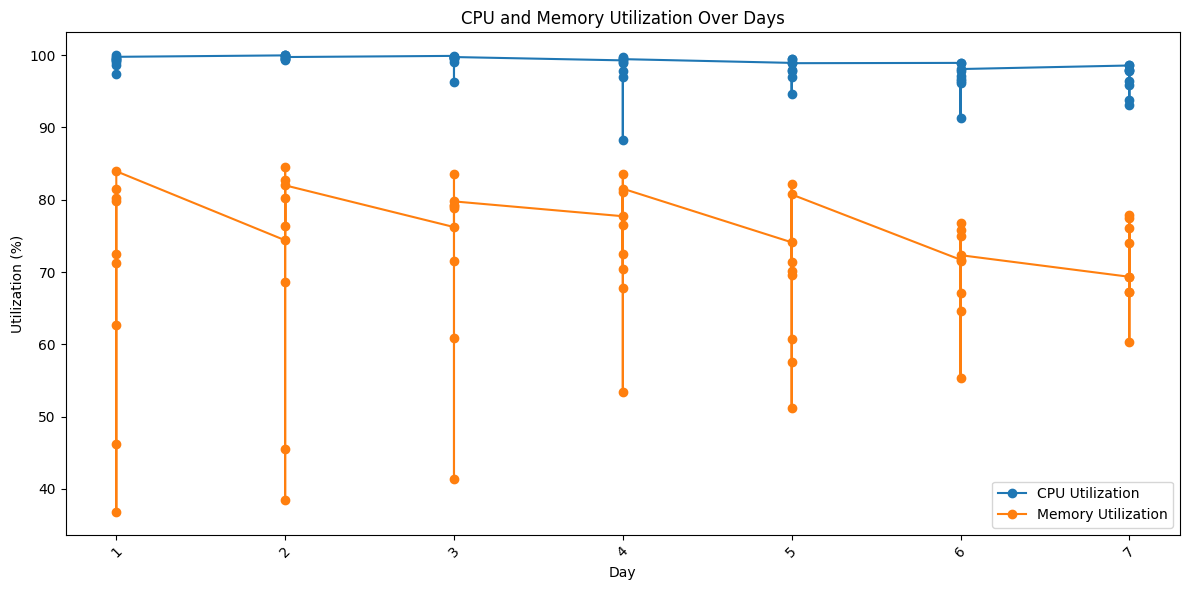

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('scheduling_metrics.csv')
data['Day'] = data['Day'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(data['Day'], data['CPU Utilization'], label='CPU Utilization', marker='o')
plt.plot(data['Day'], data['Memory Utilization'], label='Memory Utilization', marker='o')
plt.title('CPU and Memory Utilization Over Days')
plt.xlabel('Day')
plt.ylabel('Utilization (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2. Bar Plot for Average Utilization by Policy Combination:**

This bar plot shows the average CPU and Memory utilization for each policy combination. It's useful for comparing how different queueing and allocation policies affect resource usage.

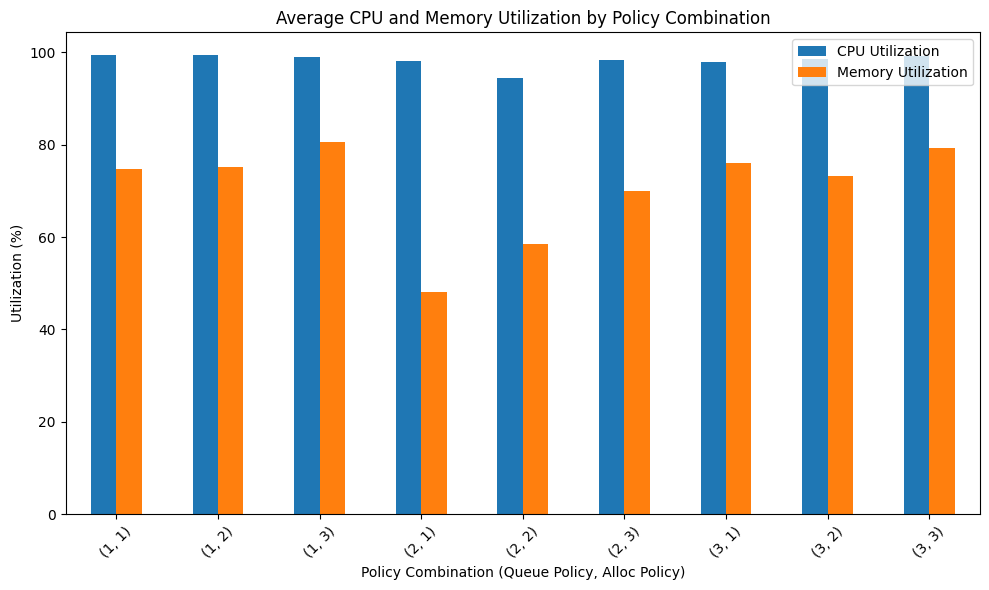

In [2]:
avg_utilization = data.groupby(['Queue Policy', 'Alloc Policy'])[['CPU Utilization', 'Memory Utilization']].mean()
avg_utilization.plot(kind='bar', figsize=(10, 6))
plt.title('Average CPU and Memory Utilization by Policy Combination')
plt.xlabel('Policy Combination (Queue Policy, Alloc Policy)')
plt.ylabel('Utilization (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3. Heatmap for Average CPU Utilization by Queue and Allocation Policy :**

This heatmap gives a quick overview of CPU utilization for each policy combination, making it easy to spot high or low utilization areas at a glance.

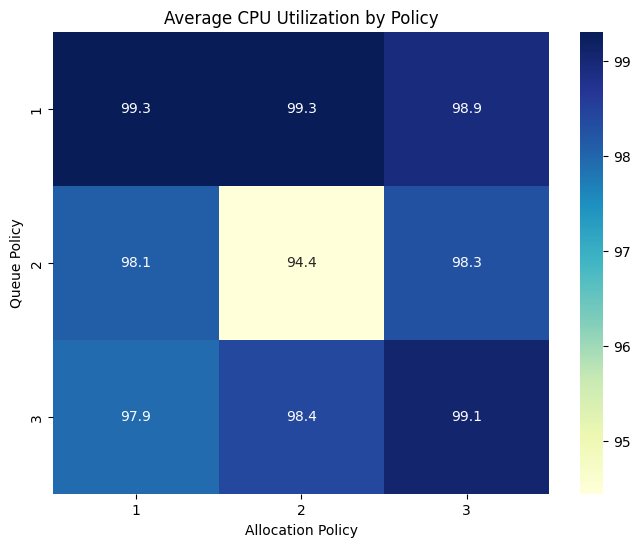

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
avg_utilization = data.groupby(['Queue Policy', 'Alloc Policy'])[['CPU Utilization']].mean().reset_index()
pivot_data = avg_utilization.pivot(index='Queue Policy', columns='Alloc Policy', values='CPU Utilization')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average CPU Utilization by Policy')
plt.xlabel('Allocation Policy')
plt.ylabel('Queue Policy')
plt.show()

**4. Scatter Plot of CPU vs. Memory Utilization with Queue Policy Size :**

This scatter plot shows the relationship between CPU and Memory utilization, with the size of each point representing the queue policy. It’s helpful to see how policies impact the balance between CPU and Memory usage.

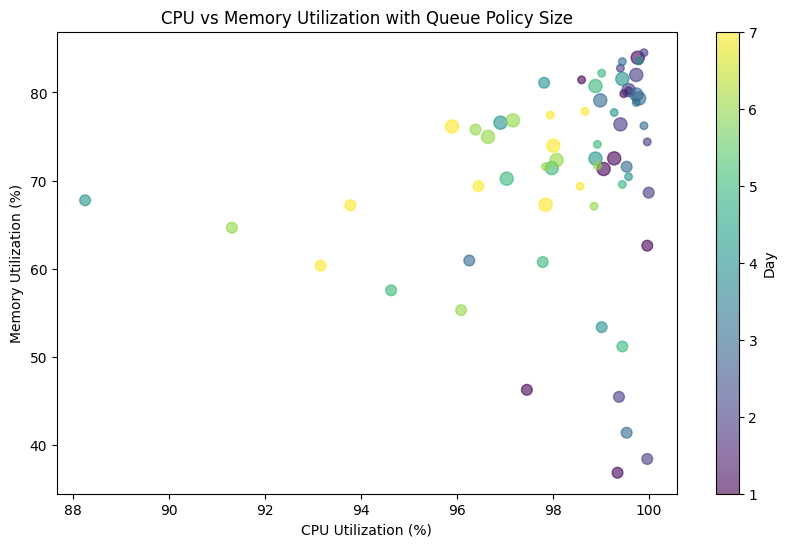

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data['Day'] = pd.to_numeric(data['Day'], errors='coerce')
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['CPU Utilization'], data['Memory Utilization'], c=data['Day'], s=data['Queue Policy']*30, cmap='viridis', alpha=0.6)
plt.colorbar(label='Day')
plt.xlabel('CPU Utilization (%)')
plt.ylabel('Memory Utilization (%)')
plt.title('CPU vs Memory Utilization with Queue Policy Size')
plt.show()



**5. Facet Grid for Each Policy Combination Over Days:**

This facet grid displays CPU utilization over days, separated by queue and allocation policy. It’s useful for tracking daily CPU usage trends across different policy combinations.

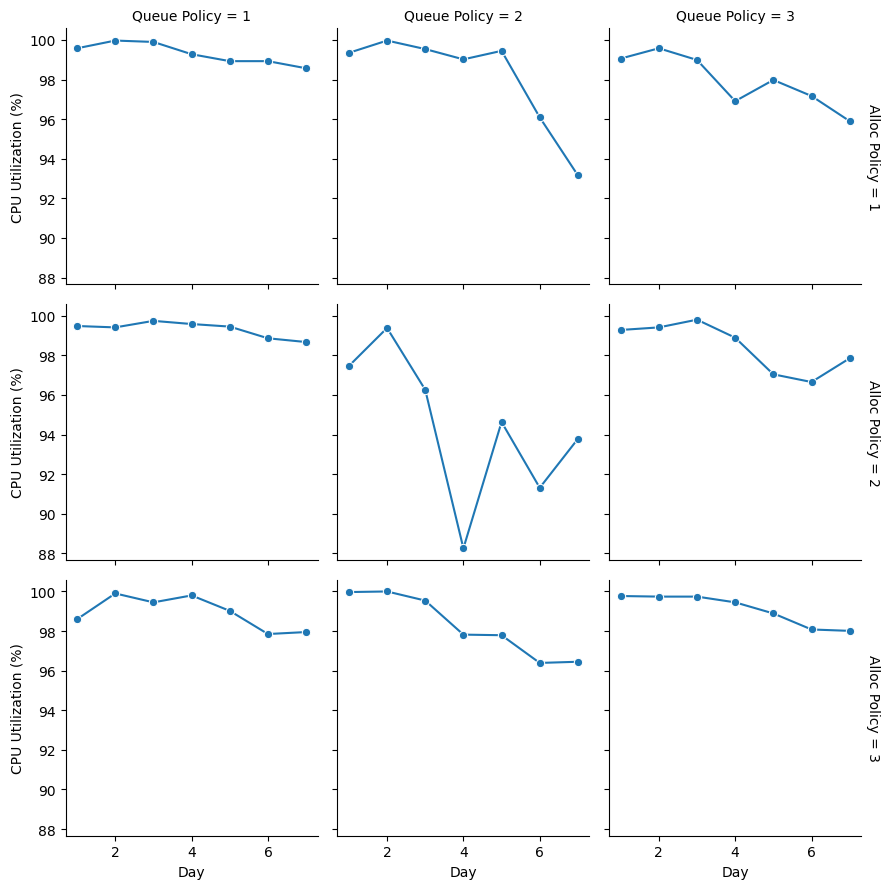

In [8]:
g = sns.FacetGrid(data, col="Queue Policy", row="Alloc Policy", height=3, margin_titles=True)
g.map_dataframe(sns.lineplot, x="Day", y="CPU Utilization", marker="o")
g.set_axis_labels("Day", "CPU Utilization (%)")
plt.show()

**6. Box Plot for CPU Utilization by Queue Policy:**

This box plot shows the distribution of CPU utilization across different queue policies. It helps to understand the variability and typical range of CPU usage for each queue policy.

<ipython-input-9-6be9d085f915>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Queue Policy', y='CPU Utilization', data=data, palette="Set3")


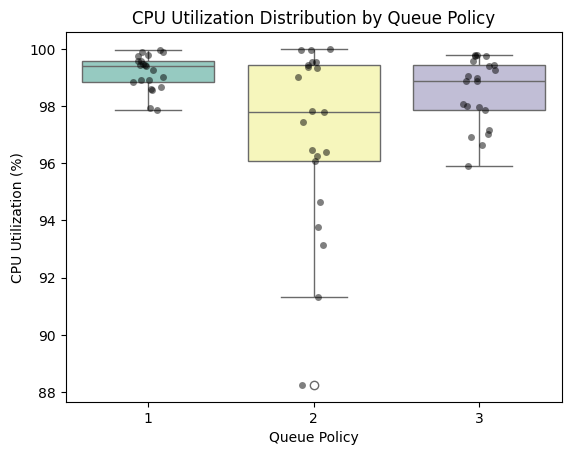

In [9]:
sns.boxplot(x='Queue Policy', y='CPU Utilization', data=data, palette="Set3")
sns.stripplot(x='Queue Policy', y='CPU Utilization', data=data, color='black', alpha=0.5)
plt.title('CPU Utilization Distribution by Queue Policy')
plt.xlabel('Queue Policy')
plt.ylabel('CPU Utilization (%)')
plt.show()

**7. Dual Y-Axis Line Plot for CPU and Memory Utilization Over Days:**

This plot has a dual y-axis for CPU and Memory utilization, making it easy to see how both metrics fluctuate over time on the same chart.

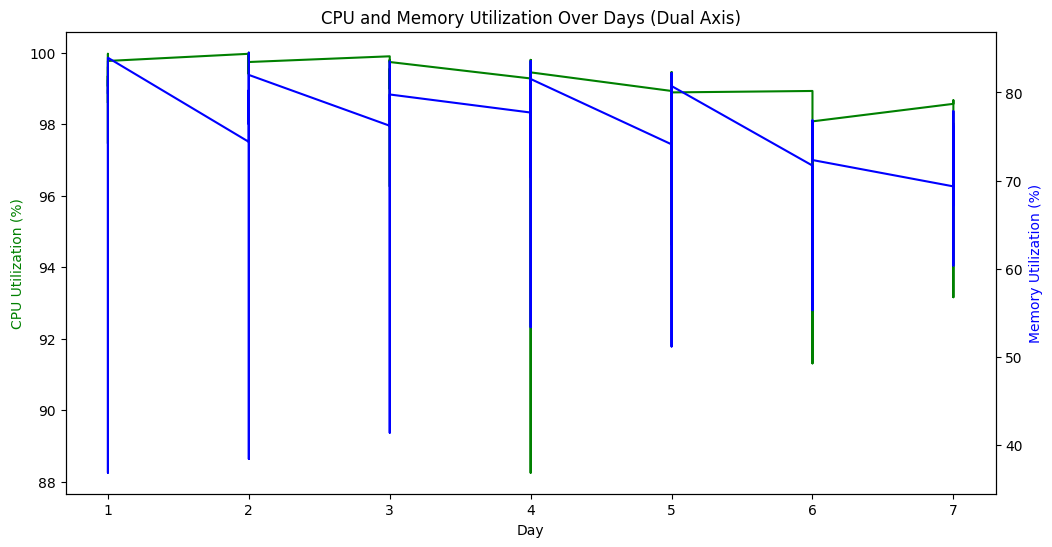

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(data['Day'], data['CPU Utilization'], 'g-', label='CPU Utilization')
ax2.plot(data['Day'], data['Memory Utilization'], 'b-', label='Memory Utilization')
ax1.set_xlabel('Day')
ax1.set_ylabel('CPU Utilization (%)', color='g')
ax2.set_ylabel('Memory Utilization (%)', color='b')
plt.title('CPU and Memory Utilization Over Days (Dual Axis)')
plt.show()

**8. Violin Plot for CPU Utilization by Allocation Policy:**

The violin plot combines aspects of box and density plots, showing the distribution of CPU utilization across allocation policies. It’s great for visualizing the spread and concentration of values.

<ipython-input-11-34b61c4f4aa7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Alloc Policy', y='CPU Utilization', data=data, inner="quartile", palette="muted")


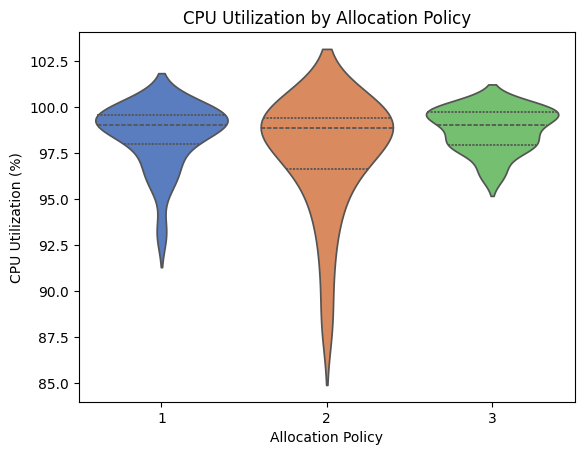

In [11]:
sns.violinplot(x='Alloc Policy', y='CPU Utilization', data=data, inner="quartile", palette="muted")
plt.title('CPU Utilization by Allocation Policy')
plt.xlabel('Allocation Policy')
plt.ylabel('CPU Utilization (%)')
plt.show()

**9. 3D Scatter Plot for Queue Policy, CPU Utilization, and Memory Utilization:**

This 3D scatter plot adds a third dimension, allowing you to visualize the impact of queue policies on both CPU and Memory utilization simultaneously.

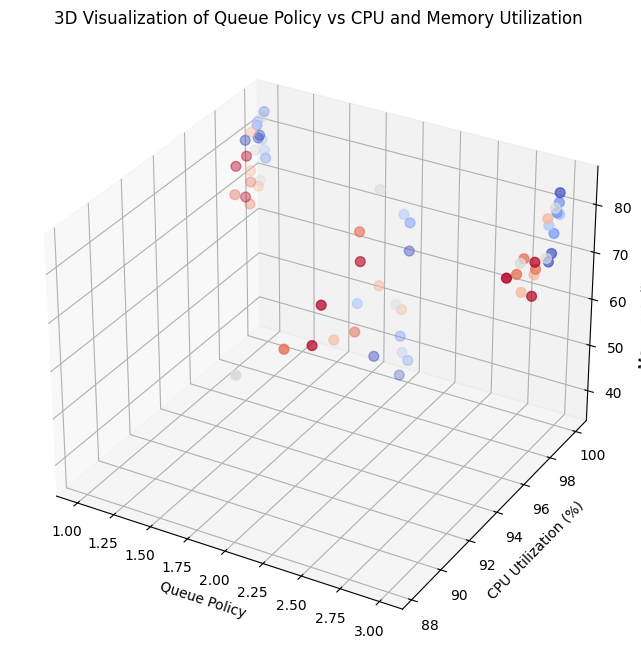

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Queue Policy'], data['CPU Utilization'], data['Memory Utilization'], c=data['Day'], cmap='coolwarm', s=50)
ax.set_xlabel('Queue Policy')
ax.set_ylabel('CPU Utilization (%)')
ax.set_zlabel('Memory Utilization (%)')
plt.title('3D Visualization of Queue Policy vs CPU and Memory Utilization')
plt.show()

**10. Pair Plot to Explore Relationships Among Policies and Utilization:**

The pair plot shows relationships between multiple metrics. It’s useful for exploring how queue and allocation policies relate to both CPU and Memory utilization.

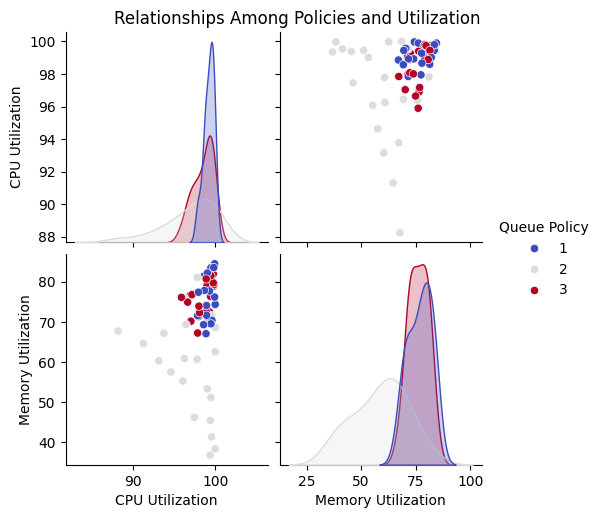

In [13]:
sns.pairplot(data, vars=['CPU Utilization', 'Memory Utilization'], hue='Queue Policy', palette='coolwarm')
plt.suptitle("Relationships Among Policies and Utilization", y=1.02)
plt.show()

Each of these visualizations offers unique insights into the job scheduling data:

1. **Trend Analysis** (line plot, dual-axis plot) shows how utilization varies over time.

2. **Comparative Analysis** (bar, heatmap, box plot) helps compare utilization across different policies.
3. **Distribution Analysis**(box plot, violin plot) provides an understanding of utilization spread for each policy.
4. **Relationship Analysis** (scatter plot, 3D plot, pair plot) reveals correlations between policies and utilization metrics.